# Sign Language Recognition System

## PART 1: Data
### Features Tutorial
##### Load the initial database

In [1]:
import numpy as np
import pandas as pd
from asl_data import AslDb


asl = AslDb() # initializes the database
asl.df.head() # displays the first five rows of the asl database, indexed by video and frame

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker
video frame                                                           
98    0         149     181      170      175     161      62  woman-1
      1         149     181      170      175     161      62  woman-1
      2         149     181      170      175     161      62  woman-1
      3         149     181      170      175     161      62  woman-1
      4         149     181      170      175     161      62  woman-1

In [2]:
asl.df.ix[98,1]  # look at the data available for an individual frame

left-x         149
left-y         181
right-x        170
right-y        175
nose-x         161
nose-y          62
speaker    woman-1
Name: (98, 1), dtype: object

The frame represented by video 98, frame 1 is shown here:
![Video 98](http://www-i6.informatik.rwth-aachen.de/~dreuw/database/rwth-boston-104/overview/images/orig/098-start.jpg)

##### Feature selection for training the model

In [3]:
# differences between hand and nose locations
asl.df['grnd-ry'] = asl.df['right-y'] - asl.df['nose-y']
asl.df['grnd-rx'] = asl.df['right-x'] - asl.df['nose-x']
asl.df['grnd-ly'] = asl.df['left-y'] - asl.df['nose-y']
asl.df['grnd-lx'] = asl.df['left-x'] - asl.df['nose-x']
# asl.df.head() 

from asl_utils import test_features_tryit
# test the code
test_features_tryit(asl)

asl.df sample


left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly  grnd-lx  
video frame                                      
98    0          113        9      119      -12  
      1          113        9      119      -12  
      2          113        9      119      -12  
      3          113        9      119      -12  
      4          113        9      119      -12

In [4]:
# collect the features into a list
features_ground = ['grnd-rx','grnd-ry','grnd-lx','grnd-ly']
# show a single set of features for a given (video, frame) tuple
[asl.df.ix[98,1][v] for v in features_ground]

[9, 113, -12, 119]

##### Build the training set

In [5]:
# show unique words that have been loaded
training = asl.build_training(features_ground)
print("Training words: {}".format(training.words))

Training words: ['VISIT', 'LOVE', 'BLUE', 'DECIDE', 'NEW', 'SEE', 'WHO', 'HIT', 'FUTURE1', 'VIDEOTAPE', 'SAY-1P', 'CHOCOLATE', 'MOTHER', 'SUE', 'SHOOT', 'MAN', 'CHICKEN', 'PEOPLE', 'FRANK', 'BOOK', 'HOUSE', 'FRIEND', 'WHAT', 'CORN1', 'FIND', 'LAST-WEEK', 'BLAME', 'LIVE', 'BOY', 'PUTASIDE', 'BOX', 'OLD', 'JOHN', 'MOVIE', 'PREFER', 'GIVE', 'SELF', 'IX', 'TELL', 'NEW-YORK', 'PAST', 'EAT', 'CHINA', 'FINISH', 'CHICAGO', 'TOY1', 'TOY', 'GIVE3', 'SEARCH-FOR', 'BUY', 'WONT', 'SHOULD', 'WRITE', 'THINK', 'JANA', 'BORROW', 'POTATO', 'HAVE', 'MARY', 'SOMETHING-ONE', 'LEAVE', 'STOLEN', 'MANY', 'ALL', 'BUY1', 'APPLE', 'STUDENT', 'IX-1P', 'GO1', 'CAR', 'SAY', 'TOMORROW', 'ANN', 'BREAK-DOWN', 'READ', 'CORN', 'FISH', 'FRED', 'BUT', 'CAN', 'FUTURE', 'HOMEWORK', 'NAME', 'TEACHER', 'COAT', 'CANDY', 'NOT', 'PARTY', 'WOMAN', 'WANT', 'GO2', 'GIVE2', 'GROUP', 'VEGETABLE', 'BROCCOLI', 'GIVE1', 'GET', 'HERE', 'NEXT-WEEK', 'BROTHER', 'YESTERDAY', 'GIRL', 'KNOW', 'GO', 'LIKE', 'WILL', 'LEG', 'SELL', 'THROW', 'ARR

The training data in `training` is an object of class `WordsData` defined in the `asl_data` module.  in addition to the `words` list, data can be accessed with the `get_all_sequences`, `get_all_Xlengths`, `get_word_sequences`, and `get_word_Xlengths` methods. We need the `get_word_Xlengths` method to train multiple sequences with the `hmmlearn` library.

In [6]:
# the first list is a concatenation of all the sequences(the X portion)
# the second is a list of the sequence lengths(the Lengths portion)
training.get_word_Xlengths('CHOCOLATE')

(array([[-11,  48,   7, 120],
        [-11,  48,   8, 109],
        [ -8,  49,  11,  98],
        [ -7,  50,   7,  87],
        [ -4,  54,   7,  77],
        [ -4,  54,   6,  69],
        [ -4,  54,   6,  69],
        [-13,  52,   6,  69],
        [-13,  52,   6,  69],
        [ -8,  51,   6,  69],
        [ -8,  51,   6,  69],
        [ -8,  51,   6,  69],
        [ -8,  51,   6,  69],
        [ -8,  51,   6,  69],
        [-10,  59,   7,  71],
        [-15,  64,   9,  77],
        [-17,  75,  13,  81],
        [ -4,  48,  -4, 113],
        [ -2,  53,  -4, 113],
        [ -4,  55,   2,  98],
        [ -4,  58,   2,  98],
        [ -1,  59,   2,  89],
        [ -1,  59,  -1,  84],
        [ -1,  59,  -1,  84],
        [ -7,  63,  -1,  84],
        [ -7,  63,  -1,  84],
        [ -7,  63,   3,  83],
        [ -7,  63,   3,  83],
        [ -7,  63,   3,  83],
        [ -7,  63,   3,  83],
        [ -7,  63,   3,  83],
        [ -7,  63,   3,  83],
        [ -7,  63,   3,  83],
        [ 

##### More feature sets

In [7]:
# mean
df_means = asl.df.groupby('speaker').mean()
asl.df['left-x-mean']= asl.df['speaker'].map(df_means['left-x'])
asl.df['left-y-mean']= asl.df['speaker'].map(df_means['left-y'])
asl.df['right-x-mean']= asl.df['speaker'].map(df_means['right-x'])
asl.df['right-y-mean']= asl.df['speaker'].map(df_means['right-y'])
asl.df['nose-x-mean']= asl.df['speaker'].map(df_means['nose-x'])
asl.df['nose-y-mean']= asl.df['speaker'].map(df_means['nose-y'])
asl.df['grnd-ry-mean']= asl.df['speaker'].map(df_means['grnd-ry'])
asl.df['grnd-rx-mean']= asl.df['speaker'].map(df_means['grnd-rx'])
asl.df['grnd-ly-mean']= asl.df['speaker'].map(df_means['grnd-ly'])
asl.df['grnd-lx-mean']= asl.df['speaker'].map(df_means['grnd-lx'])

# std
df_std = asl.df.groupby('speaker').std()
asl.df['left-x-std']= asl.df['speaker'].map(df_std['left-x'])
asl.df['left-y-std']= asl.df['speaker'].map(df_std['left-y'])
asl.df['right-x-std']= asl.df['speaker'].map(df_std['right-x'])
asl.df['right-y-std']= asl.df['speaker'].map(df_std['right-y'])
asl.df['nose-x-std']= asl.df['speaker'].map(df_std['nose-x'])
asl.df['nose-y-std']= asl.df['speaker'].map(df_std['nose-y'])
asl.df['grnd-ry-std']= asl.df['speaker'].map(df_std['grnd-ry'])
asl.df['grnd-rx-std']= asl.df['speaker'].map(df_std['grnd-rx'])
asl.df['grnd-ly-std']= asl.df['speaker'].map(df_std['grnd-ly'])
asl.df['grnd-lx-std']= asl.df['speaker'].map(df_std['grnd-lx'])

asl.df.head()

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly     ...       left-x-std  left-y-std  \
video frame                                ...                                
98    0          113        9      119     ...        17.573442   26.594521   
      1          113        9      119     ...        17.573442   26.594521   
      2          113        9      119     ...        17.573442   26.594521   
      3          113        9      119     ...        17.573442   26.594521   
      4          113        9      119     ...        17.573442   26.594521   

             right-x-std  right-y-std  nose-x-std  nose-y-std  grnd-ry-std  \
video frame                                                                  
98    0        16.459943    34.667787    3.549392     3.53833     33.97266   
      1        16.459943    34.667787    3.549392     3.53833     33.97266   
      2        16.459943    34.667787    3.549392     3.53833     33.97266   
      3        16.459943    34.667787    3.549392     3.53833     33.97266   
      4        16.459943    34.667787    3.549392     3.53833     33.97266   

             grnd-rx-std  grnd-ly-std  grnd-lx-std  
video frame                                         
98    0        16.764706    27.117393    17.328941  
      1        16.764706    27.117393    17.328941  
      2        16.764706    27.117393    17.328941  
      3        16.764706    27.117393    17.328941  
      4        16.764706    27.117393    17.328941  

[5 rows x 31 columns]

In [8]:
from asl_utils import test_std_tryit
# test the code
test_std_tryit(df_std)

df_std


,left-x,left-y,right-x,right-y,nose-x,nose-y,grnd-ry,grnd-rx,grnd-ly,grnd-lx,left-x-mean,left-y-mean,right-x-mean,right-y-mean,nose-x-mean,nose-y-mean,grnd-ry-mean,grnd-rx-mean,grnd-ly-mean,grnd-lx-mean
speaker,,,,,,,,,,,,,,,,,,,,
man-1,15.154425,36.328485,18.901917,54.902340,6.654573,5.520045,53.487999,20.269032,36.572749,15.080360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
woman-1,17.573442,26.594521,16.459943,34.667787,3.549392,3.538330,33.972660,16.764706,27.117393,17.328941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
woman-2,15.388711,28.825025,14.890288,39.649111,4.099760,3.416167,39.128572,16.191324,29.320655,15.050938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features Implementation

In [9]:
# add features for normalized by speaker values of left, right, x, y
asl.df['norm-rx'] = (asl.df['right-x']-asl.df['right-x-mean'])/asl.df['right-x-std']
asl.df['norm-ry'] = (asl.df['right-y']-asl.df['right-y-mean'])/asl.df['right-y-std']
asl.df['norm-lx'] = (asl.df['left-x']-asl.df['left-x-mean'])/asl.df['left-x-std']
asl.df['norm-ly'] = (asl.df['left-y']-asl.df['left-y-mean'])/asl.df['left-y-std']
features_norm = ['norm-rx', 'norm-ry', 'norm-lx','norm-ly']

In [10]:
# add features for polar coordinate values where the nose is the origin
asl.df['polar-rr'] = np.sqrt(asl.df['grnd-rx']**2 + asl.df['grnd-ry']**2)
asl.df['polar-rtheta'] = np.arctan2(asl.df['grnd-rx'], asl.df['grnd-ry'])
asl.df['polar-lr'] = np.sqrt(asl.df['grnd-lx']**2 + asl.df['grnd-ly']**2)
asl.df['polar-ltheta'] = np.arctan2(asl.df['grnd-lx'], asl.df['grnd-ly'])
features_polar = ['polar-rr', 'polar-rtheta', 'polar-lr', 'polar-ltheta']

In [11]:
# add features for left, right, x, y differences by one time step
asl.df["delta-rx"] = asl.df["right-x"].diff().fillna(0)
asl.df["delta-ry"] = asl.df["right-y"].diff().fillna(0)
asl.df["delta-lx"] = asl.df["left-x"].diff().fillna(0)
asl.df["delta-ly"] = asl.df["left-y"].diff().fillna(0)
features_delta = ['delta-rx', 'delta-ry', 'delta-lx', 'delta-ly']

In [12]:
# grnd norm
asl.df['norm-grnd-rx'] = (asl.df['grnd-rx']-asl.df['grnd-rx-mean'])/asl.df['grnd-rx-std']
asl.df['norm-grnd-ry'] = (asl.df['grnd-ry']-asl.df['grnd-ry-mean'])/asl.df['grnd-ry-std']
asl.df['norm-grnd-lx'] = (asl.df['grnd-lx']-asl.df['grnd-lx-mean'])/asl.df['grnd-lx-std']
asl.df['norm-grnd-ly'] = (asl.df['grnd-ly']-asl.df['grnd-ly-mean'])/asl.df['grnd-ly-std']

# polar mean
df_means = asl.df.groupby('speaker').mean()
asl.df['polar-rr-mean']= asl.df['speaker'].map(df_means['polar-rr'])
asl.df['polar-rtheta-mean']= asl.df['speaker'].map(df_means['polar-rtheta'])
asl.df['polar-lr-mean']= asl.df['speaker'].map(df_means['polar-lr'])
asl.df['polar-ltheta-mean']= asl.df['speaker'].map(df_means['polar-ltheta'])

# polar std
df_std = asl.df.groupby('speaker').std()
asl.df['polar-rr-std']= asl.df['speaker'].map(df_std['polar-rr'])
asl.df['polar-rtheta-std']= asl.df['speaker'].map(df_std['polar-rtheta'])
asl.df['polar-lr-std']= asl.df['speaker'].map(df_std['polar-lr'])
asl.df['polar-ltheta-std']= asl.df['speaker'].map(df_std['polar-ltheta'])

# polar norm
asl.df['norm-polar-rr'] = (asl.df['polar-rr']-asl.df['polar-rr-mean'])/asl.df['polar-rr-std']
asl.df['norm-polar-rtheta'] = (asl.df['polar-rtheta']-asl.df['polar-rtheta-mean'])/asl.df['polar-rtheta-std']
asl.df['norm-polar-lr'] = (asl.df['polar-lr']-asl.df['polar-lr-mean'])/asl.df['polar-lr-std']
asl.df['norm-polar-ltheta'] = (asl.df['polar-ltheta']-asl.df['polar-ltheta-mean'])/asl.df['polar-ltheta-std']

# delta grnd
asl.df["delta-grnd-rx"] = asl.df["grnd-rx"].diff().fillna(0)
asl.df["delta-grnd-ry"] = asl.df["grnd-ry"].diff().fillna(0)
asl.df["delta-grnd-lx"] = asl.df["grnd-lx"].diff().fillna(0)
asl.df["delta-grnd-ly"] = asl.df["grnd-ly"].diff().fillna(0)

# delta polar
asl.df["delta-polar-rr"] = asl.df["polar-rr"].diff().fillna(0)
asl.df["delta-polar-rtheta"] = asl.df["polar-rtheta"].diff().fillna(0)
asl.df["delta-polar-lr"] = asl.df["polar-lr"].diff().fillna(0)
asl.df["delta-polar-ltheta"] = asl.df["polar-ltheta"].diff().fillna(0)

# delta norm
asl.df["delta-norm-rx"] = asl.df["norm-rx"].diff().fillna(0)
asl.df["delta-norm-ry"] = asl.df["norm-ry"].diff().fillna(0)
asl.df["delta-norm-lx"] = asl.df["norm-lx"].diff().fillna(0)
asl.df["delta-norm-ly"] = asl.df["norm-ly"].diff().fillna(0)
asl.df["delta-norm-grnd-rx"] = asl.df["norm-grnd-rx"].diff().fillna(0)
asl.df["delta-norm-grnd-ry"] = asl.df["norm-grnd-ry"].diff().fillna(0)
asl.df["delta-norm-grnd-lx"] = asl.df["norm-grnd-lx"].diff().fillna(0)
asl.df["delta-norm-grnd-ly"] = asl.df["norm-grnd-ly"].diff().fillna(0)
asl.df["delta-norm-polar-rr"] = asl.df["norm-polar-rr"].diff().fillna(0)
asl.df["delta-norm-polar-rtheta"] = asl.df["norm-polar-rtheta"].diff().fillna(0)
asl.df["delta-norm-polar-lr"] = asl.df["norm-polar-lr"].diff().fillna(0)
asl.df["delta-norm-polar-ltheta"] = asl.df["norm-polar-ltheta"].diff().fillna(0)

features_custom = ['norm-grnd-rx', 'norm-grnd-ry', 'norm-grnd-lx', 'norm-grnd-ly',
                  'norm-polar-rr', 'norm-polar-rtheta', 'norm-polar-lr', 'norm-polar-ltheta',
                  'delta-norm-rx', 'delta-norm-ry', 'delta-norm-lx', 'delta-norm-ly',
                  'delta-norm-grnd-rx', 'delta-norm-grnd-ry', 'delta-norm-grnd-lx', 'delta-norm-grnd-ly',
                  'delta-norm-polar-rr', 'delta-norm-polar-rtheta', 'delta-norm-polar-lr', 'delta-norm-polar-ltheta']

In [13]:
f_all = asl.df.columns[7:]
f_norm = ['norm-rx', 'norm-ry', 'norm-lx', 'norm-ly',
         'norm-grnd-rx', 'norm-grnd-ry', 'norm-grnd-lx', 'norm-grnd-ly',
         'norm-polar-rr', 'norm-polar-rtheta', 'norm-polar-lr', 'norm-polar-ltheta']
f_norm_delta = f_norm + ['delta-norm-rx', 'delta-norm-ry', 'delta-norm-lx', 'delta-norm-ly', 
                        'delta-norm-grnd-rx', 'delta-norm-grnd-ry', 'delta-norm-grnd-lx', 'delta-norm-grnd-ly',
                        'delta-norm-polar-rr', 'delta-norm-polar-rtheta', 'delta-norm-polar-lr', 'delta-norm-polar-ltheta']
f_grnd = ['grnd-ry', 'grnd-rx', 'grnd-ly', 'grnd-lx',
         'norm-grnd-rx', 'norm-grnd-ry', 'norm-grnd-lx', 'norm-grnd-ly',
         'delta-grnd-rx', 'delta-grnd-ry', 'delta-grnd-lx', 'delta-grnd-ly', 
         'delta-norm-grnd-rx', 'delta-norm-grnd-ry', 'delta-norm-grnd-lx', 'delta-norm-grnd-ly']
f_polar = ['polar-rr', 'polar-rtheta', 'polar-lr', 'polar-ltheta',
          'norm-polar-rr', 'norm-polar-rtheta', 'norm-polar-lr', 'norm-polar-ltheta',
          'delta-polar-rr', 'delta-polar-rtheta', 'delta-polar-lr', 'delta-polar-ltheta',
          'delta-norm-polar-rr', 'delta-norm-polar-rtheta', 'delta-norm-polar-lr', 'delta-norm-polar-ltheta']
f_cart = ['left-x', 'left-y', 'right-x', 'right-y',
         'norm-rx', 'norm-ry', 'norm-lx', 'norm-ly',
         'delta-rx', 'delta-ry', 'delta-lx', 'delta-ly',
         'delta-norm-rx', 'delta-norm-ry', 'delta-norm-lx', 'delta-norm-ly']

**Question 1:**  What custom features did you choose for the features_custom set and why?

**Answer 1:** Mean, standard deviation, normalization and delta of cartesian and polar coordinates, as well as ground values representing differences between hand and nose locations. All features provide different measurements of the movement which will likely help the model development later.

### Features Unit Testing

In [14]:
import unittest

class TestFeatures(unittest.TestCase):

    def test_features_ground(self):
        sample = (asl.df.ix[98, 1][features_ground]).tolist()
        self.assertEqual(sample, [9, 113, -12, 119])

    def test_features_norm(self):
        sample = (asl.df.ix[98, 1][features_norm]).tolist()
        np.testing.assert_almost_equal(sample, [ 1.153,  1.663, -0.891,  0.742], 3)

    def test_features_polar(self):
        sample = (asl.df.ix[98,1][features_polar]).tolist()
        np.testing.assert_almost_equal(sample, [113.3578, 0.0794, 119.603, -0.1005], 3)

    def test_features_delta(self):
        sample = (asl.df.ix[98, 0][features_delta]).tolist()
        self.assertEqual(sample, [0, 0, 0, 0])
        sample = (asl.df.ix[98, 18][features_delta]).tolist()
        self.assertTrue(sample in [[-16, -5, -2, 4], [-14, -9, 0, 0]], "Sample value found was {}".format(sample))
                         
suite = unittest.TestLoader().loadTestsFromModule(TestFeatures())
unittest.TextTestRunner().run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.022s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

## PART 2: Model Selection
### Model Selection Tutorial
##### Train a single word using Gaussian Hidden Markov models (HMM)

In [15]:
import warnings
from hmmlearn.hmm import GaussianHMM

def train_a_word(word, num_hidden_states, features):
    
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    training = asl.build_training(features)  
    X, lengths = training.get_word_Xlengths(word)
    model = GaussianHMM(n_components=num_hidden_states, n_iter=1000).fit(X, lengths)
    logL = model.score(X, lengths)
    return model, logL

def show_model_stats(word, model):
    print("Number of states trained in model for {} is {}".format(word, model.n_components))    
    variance=np.array([np.diag(model.covars_[i]) for i in range(model.n_components)])    
    for i in range(model.n_components):  # for each hidden state
        print("hidden state #{}".format(i))
        print("mean = ", model.means_[i])
        print("variance = ", variance[i])
        print()

In [16]:
demoword = 'BOOK'

# features_ground, features_norm, features_polar, features_delta, features_custom
# f_all, f_norm, f_norm_delta, f_grnd, f_polar, f_cart
model, logL = train_a_word(demoword, 3, features_ground)
print("Number of states trained in model for {} is {}".format(demoword, model.n_components))
print("logL = {}".format(logL))    
show_model_stats(demoword, model)

Number of states trained in model for BOOK is 3
logL = -2331.11381274332
Number of states trained in model for BOOK is 3
hidden state #0
mean =  [ -1.12415027  69.44164191  17.02866283  77.7231196 ]
variance =  [ 19.70434594  16.83041492  30.51552305  11.03678246]

hidden state #1
mean =  [ -11.45300909   94.109178     19.03512475  102.2030162 ]
variance =  [  77.403668    203.35441965   26.68898447  156.12444034]

hidden state #2
mean =  [ -3.46504869  50.66686933  14.02391587  52.04731066]
variance =  [ 49.12346305  43.04799144  39.35109609  47.24195772]



##### Visualize the hidden states
Plot the means and variances for each state and feature.

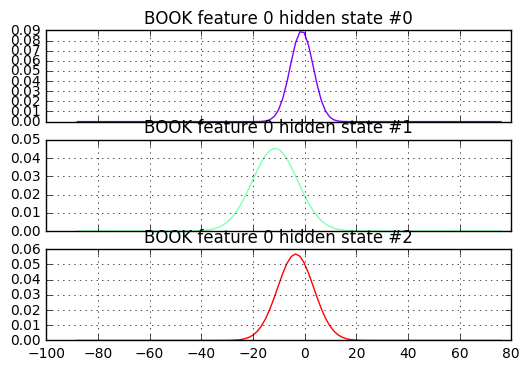

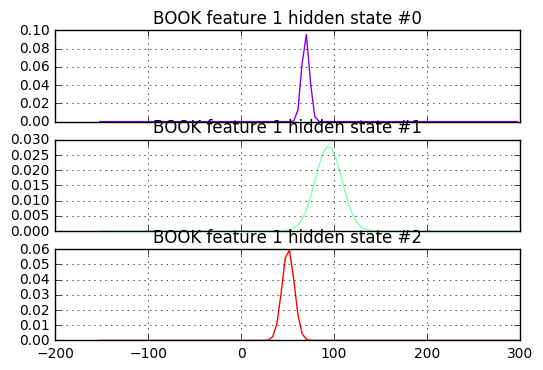

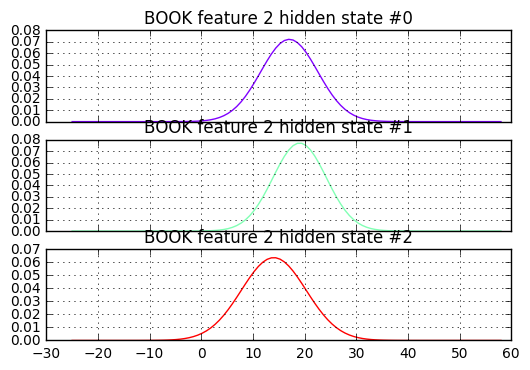

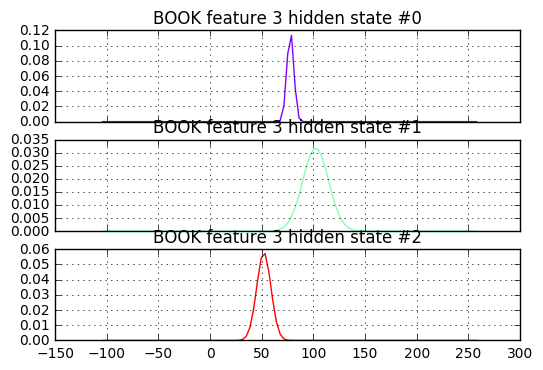

In [17]:
import math
from matplotlib import (cm, pyplot as plt, mlab)
%matplotlib inline

def visualize(word, model):
    """ visualize the input model for a particular word """
    variance=np.array([np.diag(model.covars_[i]) for i in range(model.n_components)])
    figures = []
    for parm_idx in range(len(model.means_[0])):
        xmin = int(min(model.means_[:,parm_idx]) - max(variance[:,parm_idx]))
        xmax = int(max(model.means_[:,parm_idx]) + max(variance[:,parm_idx]))
        fig, axs = plt.subplots(model.n_components, sharex=True, sharey=False)
        colours = cm.rainbow(np.linspace(0, 1, model.n_components))
        for i, (ax, colour) in enumerate(zip(axs, colours)):
            x = np.linspace(xmin, xmax, 100)
            mu = model.means_[i,parm_idx]
            sigma = math.sqrt(np.diag(model.covars_[i])[parm_idx])
            ax.plot(x, mlab.normpdf(x, mu, sigma), c=colour)
            ax.set_title("{} feature {} hidden state #{}".format(word, parm_idx, i))
            ax.grid(True)
        figures.append(plt)
    for p in figures:
        p.show()
        
visualize(demoword, model)

#####  ModelSelector class
`my_model_selectors.py`:

- `SelectorCV `:  Log likelihood with CV
- `SelectorBIC`: BIC 
- `SelectorDIC`: DIC

The simple case of training with a constant value for `n_components` can be called using `SelectorConstant` subclass:

In [19]:
from my_model_selectors import SelectorConstant

training = asl.build_training(features_ground)  
word = 'BOOK'
model = SelectorConstant(training.get_all_sequences(), training.get_all_Xlengths(), word, n_constant=3).select()
print("Number of states trained in model for {} is {}".format(word, model.n_components))

Number of states trained in model for BOOK is 3


##### Cross-validation folds

In [20]:
from sklearn.model_selection import KFold

training = asl.build_training(features_ground) 
word = 'BOOK'
word_sequences = training.get_word_sequences(word)
split_method = KFold()
for cv_train_idx, cv_test_idx in split_method.split(word_sequences):
    print("Train fold indices:{} Test fold indices:{}".format(cv_train_idx, cv_test_idx))

Train fold indices:[ 6  7  8  9 10 11 12 13 14 15 16 17] Test fold indices:[0 1 2 3 4 5]
Train fold indices:[ 0  1  2  3  4  5 12 13 14 15 16 17] Test fold indices:[ 6  7  8  9 10 11]
Train fold indices:[ 0  1  2  3  4  5  6  7  8  9 10 11] Test fold indices:[12 13 14 15 16 17]


### Model Selection Implementation
Implement `SelectorCV`, `SelectorBIC`, and `SelectorDIC` classes in the `my_model_selectors.py` module. 

In [21]:
words_to_train = ['FISH', 'BOOK', 'VEGETABLE', 'FUTURE', 'JOHN']
import timeit

In [22]:
# Implement SelectorCV in my_model_selector.py
from my_model_selectors import SelectorCV

training = asl.build_training(features_ground) 
sequences = training.get_all_sequences()
Xlengths = training.get_all_Xlengths()
for word in words_to_train:
    start = timeit.default_timer()
    model = SelectorCV(sequences, Xlengths, word, 
                    min_n_components=2, max_n_components=15, random_state = 14).select()
    end = timeit.default_timer()-start
    if model is not None:
        print("Training complete for {} with {} states with time {} seconds".format(word, model.n_components, end))
    else:
        print("Training failed for {}".format(word))

Training complete for FISH with 5 states with time 0.3378429799922742 seconds
Training complete for BOOK with 6 states with time 3.1224642530141864 seconds
Training complete for VEGETABLE with 2 states with time 1.1480380590073764 seconds
Training complete for FUTURE with 2 states with time 2.8663664940104354 seconds
Training complete for JOHN with 12 states with time 29.924102980003227 seconds


In [23]:
# Implement SelectorBIC in module my_model_selectors.py
from my_model_selectors import SelectorBIC

training = asl.build_training(features_ground)
sequences = training.get_all_sequences()
Xlengths = training.get_all_Xlengths()
for word in words_to_train:
    start = timeit.default_timer()
    model = SelectorBIC(sequences, Xlengths, word, 
                    min_n_components=2, max_n_components=15, random_state = 14).select()
    end = timeit.default_timer()-start
    if model is not None:
        print("Training complete for {} with {} states with time {} seconds".format(word, model.n_components, end))
    else:
        print("Training failed for {}".format(word))

Training complete for FISH with 5 states with time 0.2513226409791969 seconds
Training complete for BOOK with 8 states with time 1.5228821329947095 seconds
Training complete for VEGETABLE with 9 states with time 0.5406974939978682 seconds
Training complete for FUTURE with 9 states with time 1.63104347299668 seconds
Training complete for JOHN with 13 states with time 15.781637734005926 seconds


In [24]:
# Implement SelectorDIC in module my_model_selectors.py
from my_model_selectors import SelectorDIC

training = asl.build_training(features_ground)
sequences = training.get_all_sequences()
Xlengths = training.get_all_Xlengths()
for word in words_to_train:
    start = timeit.default_timer()
    model = SelectorDIC(sequences, Xlengths, word, 
                    min_n_components=2, max_n_components=15, random_state = 14).select()
    end = timeit.default_timer()-start
    if model is not None:
        print("Training complete for {} with {} states with time {} seconds".format(word, model.n_components, end))
    else:
        print("Training failed for {}".format(word))

Training complete for FISH with 5 states with time 0.2576098360004835 seconds
Training complete for BOOK with 15 states with time 1.5901376600086223 seconds
Training complete for VEGETABLE with 15 states with time 0.5325792189978529 seconds
Training complete for FUTURE with 15 states with time 1.6947906090063043 seconds
Training complete for JOHN with 15 states with time 15.999871445004828 seconds


**Question 2:**  Compare and contrast the possible advantages and disadvantages of the various model selectors implemented.

**Answer 2:**
**BIC** balances fit and complexity within the training set for each word.  In the BIC equation, a penalty term penalizes complexity to avoid overfitting, so that it is not necessary to also use cross-validation in the selection process.

**DIC** over BIC are presented by Alain Biem in this [reference](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.58.6208&rep=rep1&type=pdf). DIC scores the discriminant ability of a training set for one word against competing words.  Instead of a penalty term for complexity, it provides a penalty if model liklihoods for non-matching words are too similar to model likelihoods for the correct word in the word set.

**Cross-validation** If we simply score the model with the Log Likelihood calculated from the feature sequences it has been trained on, we should expect that more complex models will have higher likelihoods. However, that doesn't tell us which would have a better likelihood score on unseen data. The model will likely be overfit as complexity is added. To estimate which topology model is better using only the training data, we can compare scores using cross-validation. One technique for cross-validation is to break the training set into "folds" and rotate which fold is left out of training. The "left out" fold scored. This gives us a proxy method of finding the best model to use on "unseen data". In the following example, a set of word sequences is broken into three folds using the scikit-learn Kfold class object. When you implement SelectorCV, you will use this technique.

### Model Selector Unit Testing

In [25]:
from asl_test_model_selectors import TestSelectors
suite = unittest.TestLoader().loadTestsFromModule(TestSelectors())
unittest.TextTestRunner().run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 34.972s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

## PART 3: Recognizer
### Recognizer Tutorial
##### Train the full training set

In [ ]:
# The following example trains the entire set with the example `features_ground` and 
# `SelectorConstant` features and model selector.

# autoreload for automatically reloading changes made in my_model_selectors and my_recognizer
%load_ext autoreload
%autoreload 2

from my_model_selectors import SelectorConstant

def train_all_words(features, model_selector):
    training = asl.build_training(features)
    sequences = training.get_all_sequences()
    Xlengths = training.get_all_Xlengths()
    model_dict = {}
    for word in training.words:
        model = model_selector(sequences, Xlengths, word, 
                        n_constant=3).select()
        model_dict[word]=model
    return model_dict

models = train_all_words(features_ground, SelectorConstant)
print("Number of word models returned = {}".format(len(models)))

##### Load the test set
The `build_test` method in `ASLdb` is similar to the `build_training` method already presented, but there are a few differences:
- the object is type `SinglesData` 
- the internal dictionary keys are the index of the test word rather than the word itself
- the getter methods are `get_all_sequences`, `get_all_Xlengths`, `get_item_sequences` and `get_item_Xlengths`

In [ ]:
test_set = asl.build_test(features_ground)
print("Number of test set items: {}".format(test_set.num_items))
print("Number of test set sentences: {}".format(len(test_set.sentences_index)))

### Recognizer Implementation
For the final project submission, students must implement a recognizer following guidance in the `my_recognizer.py` module.  Experiment with the four feature sets and the three model selection methods (that's 12 possible combinations). You can add and remove cells for experimentation or run the recognizers locally in some other way during your experiments, but retain the results for your discussion.  For submission, you will provide code cells of **only three** interesting combinations for your discussion (see questions below). At least one of these should produce a word error rate of less than 60%, i.e. WER < 0.60 . 

**Tip:** The hmmlearn library may not be able to train or score all models.  Implement try/except contructs as necessary to eliminate non-viable models from consideration.

In [ ]:
# Implement the recognize method in my_recognizer
from my_recognizer import recognize
from asl_utils import show_errors

In [ ]:
# Choose a feature set and model selector
features = features_ground
model_selector = SelectorConstant

# Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)

In [ ]:
# Choose a feature set and model selector
features = features_ground
model_selector = SelectorConstant

# Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)

In [ ]:
# Choose a feature set and model selector
features = features_ground
model_selector = SelectorConstant

# Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)

**Question 3:**  Summarize the error results from three combinations of features and model selectors.  What was the "best" combination and why?  What additional information might we use to improve our WER?  For more insight on improving WER, take a look at the introduction to Part 4.

**Answer 3:**

### Recognizer Unit Tests

In [ ]:
from asl_test_recognizer import TestRecognize
suite = unittest.TestLoader().loadTestsFromModule(TestRecognize())
unittest.TextTestRunner().run(suite)

## PART 4: Improve the WER with Language Models

We've squeezed just about as much as we can out of the model and still only get about 50% of the words right! Surely we can do better than that.  Probability to the rescue again in the form of [statistical language models (SLM)](https://en.wikipedia.org/wiki/Language_model).  The basic idea is that each word has some probability of occurrence within the set, and some probability that it is adjacent to specific other words. We can use that additional information to make better choices.

##### Additional reading and resources
- [Introduction to N-grams (Stanford Jurafsky slides)](https://web.stanford.edu/class/cs124/lec/languagemodeling.pdf)
- [Speech Recognition Techniques for a Sign Language Recognition System, Philippe Dreuw et al](https://www-i6.informatik.rwth-aachen.de/publications/download/154/Dreuw--2007.pdf) see the improved results of applying LM on *this* data!
- [SLM data for *this* ASL dataset](ftp://wasserstoff.informatik.rwth-aachen.de/pub/rwth-boston-104/lm/)

##### Optional challenge
The recognizer you implemented in Part 3 is equivalent to a "0-gram" SLM.  Improve the WER with the SLM data provided with the data set in the link above using "1-gram", "2-gram", and/or "3-gram" statistics. The `probabilities` data you've already calculated will be useful and can be turned into a pandas DataFrame if desired (see next cell).  
Good luck!  Share your results with the class!

In [ ]:
# create a DataFrame of log likelihoods for the test word items
df_probs = pd.DataFrame(data=probabilities)
df_probs.head()